In [1]:
import pandas as pd
import re # Регулярные выражения.
import datetime 
import numpy as np
from gensim.models.word2vec import Word2Vec # Собственно модель.
from gensim.models.word2vec import LineSentence # Выравнивание текста по предложениям.
from gensim.models import KeyedVectors # Семантические вектора.

# Импортируем библиотеки Word2Vec
from gensim.models.word2vec import Word2Vec # Собственно модель.
from gensim.models.word2vec import LineSentence # Выравнивание текста по предложениям.
from gensim.models import KeyedVectors # Семантические вектора.
import matplotlib.pyplot as plt
from tqdm import tqdm

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
train = pd.read_csv('data_income/train.csv', sep = '\t')

In [4]:
def tagsdeliter(df):
    deltags = re.compile("<.+?>", re.S)
    
    df_preproc = df.copy()
    
    df_preproc['description'] = df_preproc['description'].apply(lambda x:  "".join(deltags.split(x)))  
    
    return df_preproc
        

In [ ]:
"""
# Еще можно через БьютиСуп то же самое сделать
for i in df_train['description']:

    df_train['description'] = df_train['description'].replace(i, BeautifulSoup(i, 'html5lib').get_text())

df_train.info()
"""

In [5]:
train = train.pipe(tagsdeliter)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
id             200000 non-null int64
name           200000 non-null object
description    200000 non-null object
target         200000 non-null int64
dtypes: int64(2), object(2)
memory usage: 6.1+ MB


### Опробуем w2v

In [215]:
from getnewspaper import getNewsPaper
from getnewspaper import cosineSimilarity

In [212]:
""" ВТОРОЙ РАЗ НЕ ДЕЛАТЬ !!!! """
#model_w2v = KeyedVectors.load_word2vec_format('news_upos_cbow_600_2_2018.vec.gz')

Функция векторизации текста. суммирует все вектора отдельных слов и делит на количество

In [213]:
def text_to_vec(dct, model, size):
    text_vec = np.zeros((size,), dtype="float32") # Return a new array of given shape and type, filled with zeros.
    n_words = 0

    index2word_set = set(model.index2word)
    for word in dct.keys():
        if word in index2word_set:
            n_words = n_words + 1
            text_vec = np.add(text_vec, model[word]) 
    
    if n_words != 0:
        text_vec /= n_words
    return text_vec

In [216]:
trainPos = getNewsPaper()

In [ ]:
""" Просто пример одной из вакансий в минидатафрейме"""
#jobtext = train.iloc[0,2]
#type(jobtext)

In [ ]:
""" Так можно получить частотный словарь по каждой вакансии"""
#jobdict = trainPos.getArticleDictionary(jobtext) # Просто частотный словарь

In [ ]:
""" Так можно получить частотный словарь по каждой вакансии формата W2V """
#jobdictpos=trainPos.getArticleDictionary(jobtext, True) # частотный словарь формата W2V !!!!!!!
#t2v=text_to_vec(jobdictpos, model_w2v, 600) # 600-т мерный Вектор данного словаря

<h1>Кластеризация</h1> 
<h3>Второй раз НЕ делать</h3> 

Создадим список словарей

In [ ]:
""" Вычленим список вакансий"""
jobtext_dictlist_full = []
for description in range(len(train)): # tqdm(minitrain) взамен range(len(minitrain))
    
    jobdict = trainPos.getArticleDictionary(train.iloc[description,2], True)
    
    jobtext_dictlist_full.append(jobdict)
#jobtext_dictlist_full

In [210]:
import umap

In [211]:
umap_jobs=umap.UMAP()

In [ ]:
""" Второй раз НЕ делать """
# создадим 600-тмерный массив словарей для каждого словаря из списка словарей lentaPos.dictionaries

w2v_vectors = np.array([text_to_vec(dct, model_w2v, 600) for dct in jobtext_dictlist_full]) 

### Сохранение и прочтение массивов

In [ ]:
""" Сохраним спиок словарей. ВТОРОЙ РАЗ НЕ ДЕЛАТЬ !!! """
#import shelve
#my_dict = jobtext_dictlist_full
## file to be used
#shelf = shelve.open("data_working\jobtext_dictlist_full.shlf")
## serializing
#shelf["my_dict"] = my_dict
#shelf.close() # you must close the shelve file!!!

In [ ]:
""" Прочитаем из файла спиок словарей """

#shelf = shelve.open("data_working\jobtext_dictlist_full.shlf") # the same filename that you used before, please
#jobtext_dictlist_read = shelf["my_dict"]
#shelf.close()


In [ ]:
""" Сохраним ПОЛНЫЙ массив. ВТОРОЙ РАЗ НЕ ДЕЛАТЬ !!! """"
#w2v_vectors_df = pd.DataFrame(w2v_vectors)
#w2v_vectors_df.to_csv('data_working\w2v_vectors_df.csv', encoding= 'windows-1251')

In [11]:
""" Прочитаем из файла ПОЛНЫЙ массив"""
w2v_vectors_df = pd.read_csv('data_working\w2v_vectors_df.csv', encoding= 'windows-1251')
w2v_vectors = np.array(w2v_vectors_df.iloc[:,1:])
w2v_vectors.shape

(200000, 600)

In [ ]:
""" Сохраним УМЕНЬШЕННЫЙ массив. ВТОРОЙ РАЗ НЕ ДЕЛАТЬ !!! """
#w2v_vectors_df_small = pd.DataFrame(w2v_vectors_small)
#w2v_vectors_df_small.to_csv('data_working\w2v_vectors_df_small.csv', encoding= 'windows-1251')

In [12]:
""" Прочитаем из файла УМЕНЬШЕННЫЙ массив"""
w2v_vectors_df_small = pd.read_csv('data_working\w2v_vectors_df_small.csv', encoding= 'windows-1251')
w2v_vectors_small = np.array(w2v_vectors_df_small.iloc[:,1:])
w2v_vectors_small.shape

(20000, 600)

### UMAP преобразование

Теперь попытаемся посмотреть, есть ли в описаниях вакансий какая-то скрытая структура. Для этого применим UMAP для отображения новостей на плоскость.

In [16]:
""" Полная версия ВТОРОЙ РАЗ НЕ ДЕЛАТЬ """
#umaped_v = umap_jobs.fit_transform(w2v_vectors) #  применим к нему umap преобразование

C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 125 separate connected components using meta-embedding (experimental)
  n_components


In [ ]:
""" Прочитаем из файла ПОЛНЫЙ массив """
umaped_v_df = pd.read_csv('data_working\umaped_v_df.csv', encoding= 'windows-1251')
umaped_v = np.array(umaped_v_df.iloc[:,1:])


""" Прочитаем из файла УМЕНЬШЕННЫЙ массив"""
umaped_v_df_small = pd.read_csv('data_working/umaped_v_small_df_small.csv', encoding= 'windows-1251')
umaped_v_small = np.array(umaped_v_df_small.iloc[:,1:])

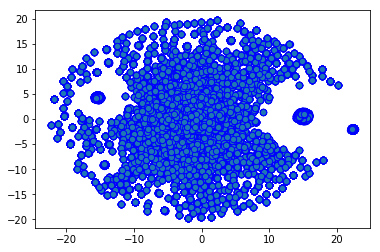

In [17]:
fig, ax = plt.subplots()
ax.scatter(umaped_v[:, 0], umaped_v[:, 1], edgecolor='b', s=40)
plt.show()

Структура очевидно есть. Хорошо бы попытаться выявить ее при помощи кластеризации.
Для начала попробуем метод k средних (k-means). Суть метода состоит в том, что мы кидаем k точек (центроидов) случайным образом. Далее мы определяем какие точки данных ближе к каким центроидам и пересчитываем положение центроидов. После нескольких шагов ситуация должна застабилизироваться.
Проведем такую кластеризацию и посмотрим на результаты.
Разным классам на рисунках ниже может соответствовать примерно один и тот же цвет. Но это не делает их одним и тем же кластером!

In [89]:
"""Сохраним ПОЛНЫЙ массив umaped_v . ВТОРОЙ РАЗ НЕ ДЕЛАТЬ !!!"""
#umaped_v_df = pd.DataFrame(umaped_v)
#umaped_v_df.to_csv('data_working/umaped_v_df.csv', encoding= 'windows-1251')


'Сохраним ПОЛНЫЙ массив umaped_v . ВТОРОЙ РАЗ НЕ ДЕЛАТЬ !!!'

### метод k средних (k-means)

In [ ]:
from sklearn.cluster import KMeans

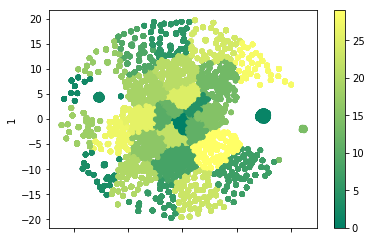

In [36]:
km=KMeans(n_clusters=30) # предположим что вакансии надо раскиджать на 30 !!!!  рубрик
km_clusters=km.fit_predict(umaped_v)
ax=pd.DataFrame(umaped_v).plot.scatter(x=0, y=1, c=km_clusters, cmap=plt.cm.summer)

In [94]:
""" Сохраним db_clusters. ВТОРОЙ РАЗ НЕ ДЕЛАТЬ !!!  """
#km_clusters_df = pd.DataFrame(km_clusters)
#km_clusters_df.to_csv('data_working/km_clusters_df.csv', encoding= 'windows-1251')

### Метод спектральной кластеризации (что-то не пошел)

Методу спектральной кластеризации также требуется передать на вход количество кластеров.

In [22]:
from sklearn.cluster import SpectralClustering

In [37]:
""" Посмотрим запустится ли на уменьшенной матрице """

sc=SpectralClustering(n_clusters=5) 
sc_clusters=sc.fit_predict(umaped_v_small)
ax=pd.DataFrame(umaped_v_small).plot.scatter(x=0, y=1, c=sc_clusters, cmap=plt.cm.Set1)

MemoryError: 

In [ ]:
sc=SpectralClustering(n_clusters=20) # предположим что вакансии надо раскиджать на 20 рубрик
sc_clusters=sc.fit_predict(umaped_v)
ax=pd.DataFrame(umaped_v).plot.scatter(x=0, y=1, c=sc_clusters, cmap=plt.cm.Set1)

### Метод DBSCAN

Также попробуемм метод DBSCAN, который выделяет области с наибольшей плотностью точек и последовательно включает в кластер точки, находящиеся ближе определенной границы к точкам, уже включенным в кластер. Данному методу не надо указывать количество кластеров, он сам их определит. Но лучше задать правдоподобные параметры eps и min_samples.

In [38]:
from sklearn.cluster import DBSCAN

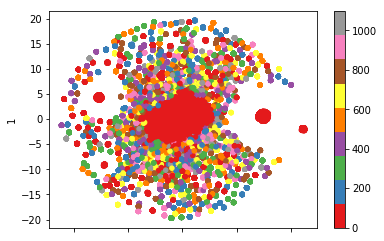

In [76]:
db=DBSCAN(eps=0.2, min_samples=3)
db_clusters=db.fit_predict(umaped_v)
ax=pd.DataFrame(umaped_v).plot.scatter(x=0, y=1, c=db_clusters, cmap=plt.cm.Set1)

In [77]:
""" Сохраним db_clusters. ВТОРОЙ РАЗ НЕ ДЕЛАТЬ !!!  """
#db_clusters_02_3_df = pd.DataFrame(db_clusters)
#db_clusters_02_3_df.to_csv('data_working/db_clusters_02_3_df.csv', encoding= 'windows-1251')

### Агломеративная кластеризация (на полном объеме тоже чёт не пошла)

Также взглянем на иерархическую (в данном случае - аггломеративную) кластеризацию.

In [42]:
from sklearn.cluster import AgglomerativeClustering

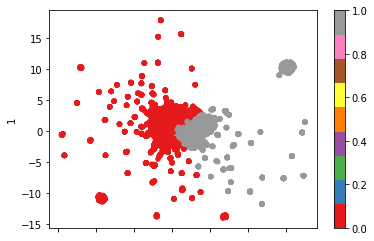

In [43]:
""" Посмотрим сперва как работает на уменьшенной матрице"""
ag=AgglomerativeClustering(linkage="complete", affinity="cosine")#, "average")
ag_clusters=ag.fit_predict(umaped_v_small) # small !!!! 
ax=pd.DataFrame(umaped_v_small).plot.scatter(x=0, y=1, c=ag_clusters, cmap=plt.cm.Set1) # small !!!! 

In [45]:
ag=AgglomerativeClustering(linkage="complete", affinity="cosine")#, "average")
ag_clusters=ag.fit_predict(umaped_v)
ax=pd.DataFrame(umaped_v).plot.scatter(x=0, y=1, c=ag_clusters, cmap=plt.cm.Set1)

MemoryError: 

### Дендрограммы

Работу метода можно визуализировать при помощи дендрограммы. (Пока не будем, ибо со временем уже туго.)

In [71]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

In [ ]:
""" Посмотрим сперва как работает на уменьшенной матрице
                         ^^^^                           """
Z = linkage(w2v_vectors_small, method='complete', metric='euclidean') # small !!!!!!!!!!!!!!!!!
fig = plt.figure(figsize=(25, 10))
_ = dendrogram(Z)

In [ ]:
import seaborn as sns
_=sns.clustermap(w2v_vectors_small, metric="euclidean", method="complete", col_cluster=False) # small !!!!!!!!!!!!!!!

Но давайте взглянем какие вакансии объединились для каждого из кластеров. Итак:

### А что нам скажет тов. Д.Б.Скан ?

In [87]:
clusters=list(set(db_clusters))

for c in clusters:
    print("\n===============",c ,"===============\n")
    cntr=0
    for i in range(len(train)): 
        if db_clusters[i]==c:
            print("\n===============")
            print(train.iloc[i,3])
            #print(train.iloc[[i],[1,3]])
            cntr+=1
            if cntr==5:
                break


=============== 0 ===============


1

1

0

0

0

=============== 1 ===============


0

0

0

0

0

=============== 2 ===============


0

0

0

0

0

=============== 3 ===============


0

0

0

0

0

=============== 4 ===============


0

1

0

1

0

=============== 5 ===============


1

1

0

0

0

=============== 6 ===============


1

1

0

0

0

=============== 7 ===============


1

0

0

0

1

=============== 8 ===============


0

0

0

0

0

=============== 9 ===============


0

0

0

0

0

=============== 10 ===============


1

1

1

1

1

=============== 11 ===============


0

1

0

0

1

=============== 12 ===============


1

1

1

1

1

=============== 13 ===============


1

1

1

1

1

=============== 14 ===============


1

1

1

1

0

=============== 15 ===============


0

1

1

0

0

=============== 16 ===============


1

1

1

1

1

=============== 17 ===============


0

0

0

0

0

=============== 18 ===============


1

1

1

1

1

=============== 19 ==

=============== 62 ===============


1

1

1

1

1

=============== 63 ===============


1

1

1

1

1

=============== 64 ===============


1

1

1

0

0

=============== 65 ===============


1

1

1

1

1

=============== 66 ===============


1

1

1

1

1

=============== 67 ===============


1

0

1

1

1

=============== 68 ===============


1

0

0

0

1

=============== 69 ===============


1

1

1

1

1

=============== 70 ===============


0

0

0

0

0

=============== 71 ===============


1

1

1

1

1

=============== 72 ===============


1

1

1

1

1

=============== 73 ===============


1

1

1

1

1

=============== 74 ===============


1

1

1

1

1

=============== 75 ===============


1

1

1

1

1

=============== 76 ===============


0

0

0

0

0

=============== 77 ===============


0

0

0

0

0

=============== 78 ===============


1

1

1

1

0

=============== 79 ===============


1

1

1

1

1

=============== 80 ===============


0

0

0

0

0

============

1

=============== 124 ===============


1

1

1

1

1

=============== 125 ===============


1

0

0

0

0

=============== 126 ===============


1

1

1

1

1

=============== 127 ===============


0

0

0

0

0

=============== 128 ===============


1

1

1

1

1

=============== 129 ===============


1

1

1

0

0

=============== 130 ===============


0

0

0

1

0

=============== 131 ===============


1

1

1

1

1

=============== 132 ===============


0

0

0

1

1

=============== 133 ===============


1

1

1

1

1

=============== 134 ===============


1

1

1

1

1

=============== 135 ===============


0

0

0

0

0

=============== 136 ===============


1

1

1

1

1

=============== 137 ===============


1

1

1

1

1

=============== 138 ===============


1

1

1

1

1

=============== 139 ===============


0

0

1

0

0

=============== 140 ===============


1

1

1

1

1

=============== 141 ===============


1

1

1

1

1

=============== 142 ===============


0

0


0

0

0

0

=============== 186 ===============


1

1

1

1

1

=============== 187 ===============


0

0

0

0

0

=============== 188 ===============


0

1

0

1

1

=============== 189 ===============


0

1

1

0

0

=============== 190 ===============


1

1

1

1

1

=============== 191 ===============


0

0

0

1

0

=============== 192 ===============


1

1

1

1

1

=============== 193 ===============


1

1

1

0

1

=============== 194 ===============


0

0

0

0

0

=============== 195 ===============


0

0

0

1

0

=============== 196 ===============


1

1

1

1

0

=============== 197 ===============


1

1

1

1

1

=============== 198 ===============


1

1

1

1

1

=============== 199 ===============


1

1

1

1

1

=============== 200 ===============


1

1

1

1

1

=============== 201 ===============


1

1

1

1

1

=============== 202 ===============


1

1

1

1

1

=============== 203 ===============


0

0

0

0

0

=============== 204 ==============

=============== 247 ===============


0

0

0

0

0

=============== 248 ===============


1

1

1

1

1

=============== 249 ===============


1

1

1

1

1

=============== 250 ===============


1

1

1

0

1

=============== 251 ===============


0

0

0

0

0

=============== 252 ===============


1

0

1

1

0

=============== 253 ===============


0

1

1

1

1

=============== 254 ===============


1

1

1

1

1

=============== 255 ===============


0

0

1

1

1

=============== 256 ===============


1

1

1

1

1

=============== 257 ===============


0

0

0

0

0

=============== 258 ===============


1

1

1

1

1

=============== 259 ===============


1

1

1

1

1

=============== 260 ===============


0

0

1

1

1

=============== 261 ===============


1

1

0

0

1

=============== 262 ===============


1

0

0

0

0

=============== 263 ===============


1

1

1

1

1

=============== 264 ===============


1

1

1

1

1

=============== 265 ===============


1

1

1


0

0

1

=============== 309 ===============


0

1

0

0

1

1

=============== 312 ===============


0

0

0

0

0

=============== 313 ===============


1

0

0

1

0

=============== 314 ===============


1

1

1

1

1

=============== 315 ===============


1

1

1

1

1

=============== 316 ===============


0

0

0

0

0

=============== 317 ===============


1

1

0

1

1

=============== 318 ===============


1

1

1

1

1

=============== 319 ===============


1

1

1

1

1

=============== 320 ===============


1

1

1

1

1

=============== 321 ===============


0

0

0

0

0

=============== 322 ===============


1

1

1

1

1

=============== 323 ===============


0

0

0

0

0

=============== 324 ===============


0

1

1

1

1

=============== 325 ===============


1

1

1

0

0

=============== 326 ===============


1

1

1

1

1

=============== 327 ===============


0

0

1

1

1

=============== 328 ===============


1

1

1

1

1

=============== 329 ==============

1

1

1

1

=============== 374 ===============


1

1

1

1

1

=============== 375 ===============


1

0

1

0

0

=============== 376 ===============


1

1

1

1

1

=============== 377 ===============


1

1

1

1

1

=============== 378 ===============


1

1

1

1

1

=============== 379 ===============


0

0

0

0

0

=============== 380 ===============


1

1

1

1

1

=============== 381 ===============


1

1

1

1

1

=============== 382 ===============


0

0

0

0

0

=============== 383 ===============


1

1

1

1

1

=============== 384 ===============


1

0

1

1

1

=============== 385 ===============


1

1

1

1

1

=============== 386 ===============


1

1

1

1

1

=============== 387 ===============


0

1

1

1

0

=============== 388 ===============


0

0

0

0

0

=============== 389 ===============


1

1

1

1

1

1

0

1

1

=============== 393 ===============


1

1

1

1

1

=============== 394 ===============


0

0

0

0

1

=============== 395 ==

=============== 444 ===============


0

0

0

0

0

=============== 445 ===============


0

0

0

0

0

=============== 446 ===============


1

1

1

1

1

=============== 447 ===============


1

1

1

1

1

=============== 448 ===============


1

1

1

1

1

=============== 449 ===============


1

1

1

1

1

=============== 450 ===============


1

1

1

1

1

=============== 451 ===============


0

1

1

1

1

=============== 452 ===============


0

0

0

0

0

=============== 453 ===============


1

1

1

1

1

=============== 454 ===============


1

1

1

1

1

=============== 455 ===============


1

1

1

1

1

=============== 456 ===============


0

0

1

1

1

1

=============== 461 ===============


0

0

0

0

0

=============== 462 ===============


0

0

0

0

0

=============== 463 ===============


1

0

1

0

0

=============== 464 ===============


0

0

0

0

0

=============== 465 ===============


1

1

1

1

1

=============== 466 ===============


1

1


=============== 513 ===============


1

1

1

1

1

=============== 514 ===============


0

0

1

0

0

=============== 515 ===============


0

1

1

1

1

=============== 516 ===============


1

1

0

0

0

=============== 517 ===============


0

0

0

0

0

=============== 518 ===============


0

0

0

0

0

=============== 519 ===============


1

1

1

1

1

=============== 520 ===============


0

0

0

0

0

=============== 521 ===============


1

1

1

=============== 523 ===============


0

0

0

0

0

=============== 524 ===============


0

0

0

0

0

=============== 525 ===============


1

1

1

1

1

=============== 526 ===============


1

1

1

1

1

=============== 527 ===============


1

1

1

1

1

=============== 528 ===============


0

0

0

1

1

=============== 529 ===============


1

1

1

1

1

=============== 530 ===============


1

1

1

1

1

=============== 531 ===============


1

1

1

0

0

=============== 532 ===============


0

0

0

0

0


=============== 578 ===============


0

0

0

0

0

=============== 579 ===============


1

1

1

1

1

=============== 580 ===============


1

1

1

1

0

=============== 581 ===============


1

1

1

1

1

=============== 582 ===============


1

1

1

1

1

=============== 583 ===============


1

1

1

1

1

=============== 584 ===============


0

0

0

0

0

=============== 585 ===============


0

0

0

0

0

=============== 586 ===============


1

1

1

1

1

=============== 587 ===============


0

1

1

0

1

=============== 588 ===============


1

1

1

1

1

=============== 589 ===============


0

1

0

1

1

=============== 590 ===============


1

1

1

1

1

=============== 591 ===============


1

1

1

1

1

=============== 592 ===============


1

1

1

1

1

=============== 593 ===============


1

1

1

1

1

=============== 594 ===============


1

1

1

1

1

=============== 595 ===============


1

1

1

1

0

=============== 596 ===============


0

0

0


1

=============== 640 ===============


1

1

1

1

0643 ===============


1

1

1

1

1

=============== 644 ===============


1

1

1

1

1

=============== 645 ===============


0

0

0

0

0

=============== 646 ===============


1

1

1

1

1

=============== 647 ===============


0

0

0

0

0

=============== 648 ===============


1

1

1

1

1

=============== 649 ===============


1

1

1

1

1

=============== 650 ===============


0

0

0

0

0

=============== 651 ===============


1

1

1

1

1

=============== 652 ===============


1

1

1

1

0

=============== 653 ===============


0

0

0

0

1

=============== 654 ===============


1

1

1

1

0

=============== 655 ===============


1

1

1

1

1

=============== 656 ===============


1

1

1

1

1

=============== 657 ===============


1

1

1

1

1

=============== 658 ===============


1

1

1

1

1

=============== 659 ===============


1

1

1

1

1

=============== 660 ===============


1

1

1

0

0

========

1

=============== 706 ===============


1

1

1

1

1

=============== 707 ===============


1

1

0

1

0

=============== 708 ===============


1

1

1

1

1

=============== 709 ===============


1

1

1

1

1

=============== 710 ===============


0

0

0

0

0

=============== 711 ===============


1

1

1

1

1

=============== 712 ===============


0

0

0

0

0

=============== 713 ===============


1

1

1

1

1

=============== 714 ===============


1

1

1

1

1

=============== 715 ===============


1

1

1

1

0

=============== 716 ===============


1

1

1

1

1

=============== 717 ===============


0

0

0

0

0

=============== 718 ===============


0

0

0

0

0

=============== 719 ===============


0

1

1

1

1

=============== 720 ===============


1

1

1

1

1

=============== 721 ===============


0

0

0

0

0

=============== 722 ===============


1

1

1

1

1

=============== 723 ===============


1

1

1

1

1

=============== 724 ===============


0

1


1

1

1

1

=============== 768 ===============


0

0

0

0

0

=============== 769 ===============


1

1

0

1

1

=============== 770 ===============


1

1

1

1

1

=============== 771 ===============


1

0

1

1

1

=============== 772 ===============


1

1

1

1

1

=============== 773 ===============


0

0

0

0

0

=============== 774 ===============


1

1

1

1

1

=============== 775 ===============


1

1

1

1

1

=============== 776 ===============


0

0

0

1

0

=============== 777 ===============


1

1

1

1

1

=============== 778 ===============


1

1

1

1

0

=============== 779 ===============


1

1

1

1

1

=============== 780 ===============


0

0

0

0

0

=============== 781 ===============


0

0

0

0

0

=============== 782 ===============


0

0

0

0

0

=============== 783 ===============


1

1

1

1

1

=============== 784 ===============


0

0

0

1

0

=============== 785 ===============


1

1

1

1

1

=============== 786 ==============

=============== 829 ===============


0

0

0

0

0

=============== 830 ===============


1

1

1

1

1

=============== 831 ===============


0

0

0

0

0

=============== 832 ===============


1

1

1

1

1

=============== 833 ===============


1

1

0

1

1

=============== 834 ===============


0

0

0

0

0

=============== 835 ===============


1

1

1

1

1

=============== 836 ===============


0

0

0

0

0

=============== 837 ===============


0

0

0

0

0

=============== 838 ===============


1

1

1

1

1

=============== 839 ===============


1

1

1

1

1

=============== 840 ===============


1

1

1

1

1

=============== 841 ===============


1

1

1

1

1

=============== 842 ===============


1

0

0

0

0

=============== 843 ===============


0

0

0

0

0

=============== 844 ===============


0

0

0

0

0

=============== 845 ===============


1

1

1

1

1

=============== 846 ===============


0

0

0

0

0

=============== 847 ===============


0

0

0


1

1

1

=============== 891 ===============


1

1

1

1

1

=============== 892 ===============


1

1

1

1

1

=============== 893 ===============


1

1

1

1

0

=============== 894 ===============


0

0

0

0

0

=============== 895 ===============


1

1

1

1

1

=============== 896 ===============


1

1

1

1

1

=============== 897 ===============


0

0

0

0

0

=============== 898 ===============


0

0

0

0

0

=============== 899 ===============


1

1

1

1

1

=============== 900 ===============


1

1

1

1

1

=============== 901 ===============


0

0

0

0

0

=============== 902 ===============


0

0

0

1

1

=============== 903 ===============


1

0

0

1

1

=============== 904 ===============


0

0

0

0

0

=============== 905 ===============


1

1

1

1

1

=============== 906 ===============


1

1

1

1

1

=============== 907 ===============


1

1

1

1

1

=============== 908 ===============


0

0

0

0

0

=============== 909 ===============



0

0

0

0

0

=============== 953 ===============


1

1

1

1

1

=============== 954 ===============


1

0

1

0

0

=============== 955 ===============


1

1

0

0

1

=============== 956 ===============


1

1

1

1

1

=============== 957 ===============


1

1

1

1

1

=============== 958 ===============


1

1

1

1

1

=============== 959 ===============


1

1

1

1

1

=============== 960 ===============


1

1

1

1

1

=============== 961 ===============


1

1

1

1

1

=============== 962 ===============


1

1

1

1

1

=============== 963 ===============


1

1

1

1

1

=============== 964 ===============


1

1

1

1

1

=============== 965 ===============


1

1

1

1

1

=============== 966 ===============


0

0

0

0

0

=============== 967 ===============


1

1

1

1

1

=============== 968 ===============


0

0

0

0

1

=============== 969 ===============


1

1

1

1

1

=============== 970 ===============


0

0

0

0

0

=============== 971 ===========

1

1

=============== 1014 ===============


1

1

1

1

1

=============== 1015 ===============


1

1

1

1

1

=============== 1016 ===============


1

1

1

1

1

=============== 1017 ===============


0

0

0

0

0

=============== 1018 ===============


0

0

0

0

1

=============== 1019 ===============


1

1

1

1

1

=============== 1020 ===============


1

1

1

1

1

=============== 1021 ===============


0

1

1

1

0

=============== 1022 ===============


1

1

1

1

1

=============== 1023 ===============


1

1

1

1

1

=============== 1024 ===============


0

0

1

1

1

=============== 1025 ===============


1

1

1

1

1

=============== 1026 ===============


1

1

1

1

1

=============== 1027 ===============


0

0

0

0

0

=============== 1028 ===============


0

0

0

0

0

=============== 1029 ===============


1

1

1

1

1

=============== 1030 ===============


1

1

1

1

1

=============== 1031 ===============


1

1

1

1

1

=============== 1032 =

1

=============== 1075 ===============


1

1

1

1

1

=============== 1076 ===============


1

1

1

1

1

=============== 1077 ===============


0

0

0

0

0

=============== 1078 ===============


0

0

0

0

0

=============== 1079 ===============


1

1

1

1

1

=============== 1080 ===============


1

1

1

1

1

=============== 1081 ===============


1

1

1

1

1

=============== 1082 ===============


1

0

0

1

0

=============== 1083 ===============


0

0

0

1

0

=============== 1084 ===============


1

1

1

1

1

=============== 1085 ===============


1

1

1

1

1

=============== 1086 ===============


1

1

1

1

1

=============== 1087 ===============


1

1

1

1

1

=============== 1088 ===============


1

1

1

=============== 1089 ===============


0

0

0

0

0

=============== 1090 ===============


1

1

1

1

1

=============== 1091 ===============


1

1

1

0

1

=============== 1092 ===============


1

1

1

1

1

=============== 1093 ==========

не плохо, не плохо..

### А что нам скажет тов. К.Средних ?

In [85]:
clusters=list(set(km_clusters))

for c in clusters:
    print("\n===============",c ,"===============\n")
    cntr=0
    for i in range(len(train)): 
        if km_clusters[i]==c:
            print("\n===============")
            print(train.iloc[[i],[1,3]])
            cntr+=1
            if cntr==5:
                break


=============== 0 ===============


                                name  target
12  Специалист технической поддержки       0

                              name  target
14  Менеджер по работе с клиентами       1

                                                 name  target
23  Торговый представитель в Севастополе (кабель, ...       1

                    name  target
27  Менеджер по продажам       1

                    name  target
32  Управляющий филиалом       1

=============== 1 ===============


                                               name  target
11  Продавец-кассир (г Орск, ул Станиславского, 13)       0

                                                 name  target
13  Продавец-кассир (г Истра, ул 9 Гвардейской Див...       0

                                                 name  target
22  Продавец-кассир (г Санкт-Петербург, ул Шаврова...       0

                                               name  target
24  Продавец-кассир (г Ставрополь, ул Пирогова, 44)       0

58  Account Manager       0

                     name  target
74  Тестировщик (backend)       0

=============== 16 ===============


                    name  target
51  Менеджер по продажам       1

                    name  target
68  Менеджер по продажам       1

                       name  target
122  Торговый представитель       1

                                name  target
164  Менеджер по продажам IT техники       1

                             name  target
329  Менеджер по оптовым продажам       1

=============== 17 ===============


          name  target
3  Фрезеровщик       0

                                              name  target
16  Директор магазина (г Кемерово, ул Свободы, 12)       0

                    name  target
54  Продавец-консультант       1

       name  target
221  Токарь       0

                name  target
278  Продавец-кассир       1

=============== 18 ===============


                                                 name  target
33  Продавец-

тоже весьма и весьма..

 С дендрограммами поиграемся возможно позже ..

### Подготовка тренировочной выборки

In [144]:
db_clusters_df = pd.DataFrame(db_clusters,columns=['db_clusters'])
km_clusters_df = pd.DataFrame(km_clusters,columns=['km_clusters'])
umaped_v_df    = pd.DataFrame(umaped_v,columns=['umaped_v_x','umaped_v_y'])

frames = [train, db_clusters_df, km_clusters_df, umaped_v_df]

new_train = pd.concat(frames, axis=1, join_axes=[train.index])
new_train.drop(['name','description','id'], axis=1, inplace=True)

In [148]:
cols = ['db_clusters','km_clusters','umaped_v_x','umaped_v_y','target']
df_preproc = pd.DataFrame(new_train, columns=cols)
df_preproc.head()

,db_clusters,km_clusters,umaped_v_x,umaped_v_y,target
0,0,12,-2.367531,0.940134,1
1,1,20,-10.181526,-9.900029,0
2,2,27,-11.834425,-6.788554,0
3,3,17,-11.238812,8.480206,0
4,0,10,-4.119198,1.122090,1


In [178]:
df_preproc_2 = df_preproc.copy()
df_preproc_2.drop(['db_clusters','km_clusters'], axis=1, inplace=True)

df_preproc_3 = df_preproc.copy()
df_preproc_3.drop(['km_clusters'], axis=1, inplace=True)

df_preproc_4 = df_preproc.copy()
df_preproc_4.drop(['db_clusters'], axis=1, inplace=True)

df_preproc_4.head()

,km_clusters,umaped_v_x,umaped_v_y,target
0,12,-2.367531,0.940134,1
1,20,-10.181526,-9.900029,0
2,27,-11.834425,-6.788554,0
3,17,-11.238812,8.480206,0
4,10,-4.119198,1.122090,1


In [189]:
df_preproc_5 = pd.get_dummies(df_preproc, columns=['db_clusters', 'km_clusters'])
df_preproc_5.columns

Index(['umaped_v_x', 'umaped_v_y', 'target', 'db_clusters_-1', 'db_clusters_0',
       'db_clusters_1', 'db_clusters_2', 'db_clusters_3', 'db_clusters_4',
       'db_clusters_5',
       ...
       'km_clusters_20', 'km_clusters_21', 'km_clusters_22', 'km_clusters_23',
       'km_clusters_24', 'km_clusters_25', 'km_clusters_26', 'km_clusters_27',
       'km_clusters_28', 'km_clusters_29'],
      dtype='object', length=1136)

In [193]:
cols2 = [col for col in df_preproc_5 if col !='target'] + ['target']
df_preproc_5 = df_preproc_5[cols2]

## Логистическая Регрессия!

#### Датафрейм   df_preproc_2

In [147]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression  # импортируем модель машинного обучения
from sklearn.model_selection import train_test_split

In [151]:
from scipy.stats import randint as randint
from scipy.stats import uniform
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [162]:
X, y = df_preproc_2.iloc[:, :-1].values, df_preproc_2.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [163]:
param_grid_log = {
    'C': randint(10, 18),
    'tol': [1e-4, 1e-5, 1e-3],
    'class_weight': [None, 'balanced']}

cv_log = StratifiedKFold(n_splits=15, random_state=123, shuffle=True)

model_log = LogisticRegression(random_state=123)
random_search = RandomizedSearchCV(model_log, param_distributions=param_grid_log, n_iter=20, n_jobs=-1,
                                   cv=cv_log, scoring='roc_auc', random_state=123)
random_search.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=15, random_state=123, shuffle=True),
          error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000023A6D2F60>, 'tol': [0.0001, 1e-05, 0.001], 'class_weight': [None, 'balanced']},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [164]:
random_search.best_params_

{'C': 14, 'class_weight': 'balanced', 'tol': 0.0001}

In [165]:
model_log = random_search.best_estimator_
ra_log_train = random_search.best_score_
ra_log_train

0.7703030433761803

In [166]:
TEST_log = model_log.predict(X_test)
model_log.score(X_test, y_test)

0.7983030303030303

In [167]:
from sklearn.metrics import roc_auc_score

In [168]:
ra_log_test = roc_auc_score(y_test, TEST_log)
ra_log_test

0.7995259677573376

In [169]:
print(classification_report(y_test, TEST_log))

             precision    recall  f1-score   support

          0       0.83      0.78      0.80     34984
          1       0.77      0.82      0.79     31016

avg / total       0.80      0.80      0.80     66000



### Сформируем sample_submission

In [203]:
df_test = pd.read_csv('data_income/test.csv', sep = '\t')

In [204]:

df_test.head().T

,0,1,2,3,4
id,200000,200001,200002,200003,200004
name,Дизайнер-консультант мебели,Продавец-консультант (ТЦ на Пушкина),Менеджер по продажам,Продавец-консультант в магазин одежды (ТЦ Волн...,Специалист по охране труда
description,<p><strong>Обязанности:</strong></p> <ul> <li>...,<p><strong>Обязанности</strong>:</p> <p>∙ конс...,<p>Торговый Дом «Форт» это ведущая компания Пе...,<p><strong>Требуются продавцы консультанты в м...,<strong>Обязанности:</strong> <ul> <li> <p>осу...


In [205]:
sub_res = pd.read_csv('data_income/sampleSubmission.csv')

In [208]:
test = df_test.pipe(tagsdeliter)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170179 entries, 0 to 170178
Data columns (total 3 columns):
id             170179 non-null int64
name           170179 non-null object
description    170179 non-null object
dtypes: int64(1), object(2)
memory usage: 3.9+ MB


In [209]:
""" Вычленим список вакансий"""
jobtext_dictlist_test = []
for description in range(len(test)): # tqdm(minitrain) взамен range(len(minitrain))
    
    jobdict = trainPos.getArticleDictionary(test.iloc[description,2], True)
    
    jobtext_dictlist_test.append(jobdict)
jobtext_dictlist_test

[{'работа_NOUN': 2},
 {'покупатель_NOUN': 2,
  'бренд_NOUN': 3,
  'поддержание_NOUN': 2,
  'уровень_NOUN': 2,
  'работа_NOUN': 3,
  'компания_NOUN': 2,
  'наш_ADJ': 2,
  'корпоративный_ADJ': 2},
 {'компания_NOUN': 3,
  'свой_ADJ': 3,
  'клиентский_ADJ': 3,
  'база_NOUN': 3,
  'менеджер_NOUN': 2,
  'продажа_NOUN': 6,
  'возможность_NOUN': 3,
  'достойный_ADJ': 2,
  'работа_NOUN': 7,
  'привлечение_NOUN': 2,
  'новый_ADJ': 2,
  'клиент_NOUN': 3,
  'оформление_NOUN': 2,
  'контроль_NOUN': 2,
  'достижение_NOUN': 2,
  'активный_ADJ': 2,
  'постоянный_ADJ': 2,
  'обучение_NOUN': 2},
 {'продавец_NOUN': 2,
  'магазин_NOUN': 3,
  'женский_ADJ': 2,
  'дизайнерский_ADJ': 2,
  'одежда_NOUN': 3,
  'мужской_ADJ': 3,
  'классический_ADJ': 2,
  'индивидуальный_ADJ': 2,
  'продажа_NOUN': 3,
  'стиль_NOUN': 2,
  'работа_NOUN': 6,
  'условие_NOUN': 2,
  'высокий_ADJ': 2,
  'дополнительный_ADJ': 2,
  'возможность_NOUN': 2,
  'рост_NOUN': 2},
 {'контроль_NOUN': 5,
  'соблюдение_NOUN': 4,
  'охрана_NOUN': 

In [214]:
""" Второй раз НЕ делать """
# создадим 600-тмерный массив словарей для каждого словаря из списка словарей lentaPos.dictionaries

w2v_vectors_test = np.array([text_to_vec(dct, model_w2v, 600) for dct in jobtext_dictlist_test]) 

In [217]:
umaped_v_test = umap_jobs.fit_transform(w2v_vectors_test) #  применим к нему umap преобразование

C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 93 separate connected components using meta-embedding (experimental)
  n_components
C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:182: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


In [219]:
"""Сохраним ПОЛНЫЙ массив umaped_v . ВТОРОЙ РАЗ НЕ ДЕЛАТЬ !!!"""
umaped_v_test_df = pd.DataFrame(umaped_v_test)
umaped_v_test_df.to_csv('data_working/umaped_v_test_df.csv', encoding= 'windows-1251')

In [220]:
umaped_v_test_df    = pd.DataFrame(umaped_v_test,columns=['umaped_v_x','umaped_v_y'])

In [221]:
frames = [test, umaped_v_test_df ]

new_test = pd.concat(frames, axis=1, join_axes=[test.index])
new_test.drop(['name','description','id'], axis=1, inplace=True)

In [222]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170179 entries, 0 to 170178
Data columns (total 2 columns):
umaped_v_x    170179 non-null float32
umaped_v_y    170179 non-null float32
dtypes: float32(2)
memory usage: 1.3 MB


In [ ]:
df_test.loc[:, 'target'] = 0 # чтоб функция не ругалась..
df_test_preproc = df_test.pipe(preproc)
del df_test_preproc['target'] 
df_test_preproc.head()